In [42]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
import sklearn 
import tkinter as tk
from flask import Flask
from  dotenv import dotenv_values
import pyodbc


In [43]:
# Load the datasets
df_train = pd.read_csv("F:\\school\\Azubi Africa\\P5-ML-API\\data\\Paitients_Files_Train.csv")
df_test = pd.read_csv("F:\\school\\Azubi Africa\\P5-ML-API\\data\\Paitients_Files_Test.csv")


In [44]:
# Display initial information about the datasets
print("Train Dataset:")
print(df_train.head())
print(df_train.info())
print(df_train.columns)

print("\nTest Dataset:")
print(df_test.head())
print(df_test.info())
print(df_test.columns)


Train Dataset:
          ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance   Sepssis
0  ICU200010    6  148  72  35    0  33.6  0.627   50          0  Positive
1  ICU200011    1   85  66  29    0  26.6  0.351   31          0  Negative
2  ICU200012    8  183  64   0    0  23.3  0.672   32          1  Positive
3  ICU200013    1   89  66  23   94  28.1  0.167   21          1  Negative
4  ICU200014    0  137  40  35  168  43.1  2.288   33          1  Positive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null  

In [45]:
# Data Cleaning

# Function to clean dataset
def clean_dataset(df):
    # Remove duplicates
    df.drop_duplicates(inplace=True)
    
    # Handle missing values
    df.fillna(df.mean(), inplace=True)
    
    # Convert 'Age' to integer
    df['Age'] = df['Age'].astype(int)
    
    # Convert 'Insurance' to boolean
    df['Insurance'] = df['Insurance'].astype(bool)
    
    return df


In [46]:
def clean_dataset(df):
    # Remove duplicates
    df.drop_duplicates(inplace=True)
    
    # Handle missing values
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_columns = df.select_dtypes(include=['object']).columns
    
    # Fill numeric columns with mean
    df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
    
    # Fill categorical columns with mode
    for col in categorical_columns:
        df[col].fillna(df[col].mode()[0], inplace=True)
    
    # Convert 'Age' to integer (if it exists and is numeric)
    if 'Age' in df.columns and df['Age'].dtype in ['int64', 'float64']:
        df['Age'] = df['Age'].astype(int)
    
    return df

# Clean both datasets
df_train_cleaned = clean_dataset(df_train.copy())
df_test_cleaned = clean_dataset(df_test.copy())


C:\Users\MoseS\AppData\Local\Temp\ipykernel_15804\1793656851.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\MoseS\AppData\Local\Temp\ipykernel_15804\1793656851.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [47]:
# Display info after cleaning
print("\nTrain Dataset after cleaning:")
print(df_train_cleaned.info())

print("\nTest Dataset after cleaning:")
print(df_test_cleaned.info())



Train Dataset after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB
None

Test Dataset after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 n

In [48]:
# Save cleaned datasets
df_train_cleaned.to_csv('cleaned_train_dataset.csv', index=False)
df_test_cleaned.to_csv('cleaned_test_dataset.csv', index=False)


In [49]:
# Exploratory Data Analysis (EDA)

# Function for EDA
def perform_eda(df, title):
    print(f"\nExploratory Data Analysis for {title} Dataset:")
    
    # Numerical variables distribution
    for col in df.select_dtypes(include=[np.number]).columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col} - {title}')
        plt.show()
    
    # Correlation heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.title(f'Correlation Heatmap - {title}')
    plt.show()
    
    # Pairplot for numerical variables
    sns.pairplot(df)
    plt.suptitle(f'Pairplot - {title}', y=1.02)
    plt.show()
    
    # Boxplot for numerical variables
    df.boxplot(figsize=(12, 6))
    plt.title(f'Boxplot of Numerical Variables - {title}')
    plt.xticks(rotation=90)
    plt.show()
    
    # Categorical variables distribution
    for col in df.select_dtypes(include=['object', 'bool']).columns:
        plt.figure(figsize=(10, 6))
        df[col].value_counts().plot(kind='bar')
        plt.title(f'Distribution of {col} - {title}')
        plt.show()


In [50]:
import pandas as pd

# Function to clean the column by converting numeric-like strings to floats
def clean_column(column):
    def convert_to_float(value):
        try:
            return float(value)
        except ValueError:
            return None  # Replace non-numeric values with None (or NaN)

    return column.apply(convert_to_float)

# Example data
data_train = {'Column1': [1.0, 2.0, 'ICU200010', 4.0]}
data_test = {'Column1': [5.0, 6.0, 7.0, 'ICU200010']}

df_train_cleaned = pd.DataFrame(data_train)
df_test_cleaned = pd.DataFrame(data_test)

# Clean the datasets
df_train_cleaned['Column1'] = clean_column(df_train_cleaned['Column1'])
df_test_cleaned['Column1'] = clean_column(df_test_cleaned['Column1'])

# Function to perform EDA
def perform_eda(df, dataset_name):
    print(f"Performing EDA on {dataset_name} dataset")
    print(df.describe())


In [51]:
# Perform EDA on both datasets
perform_eda(df_train_cleaned, 'Train')
perform_eda(df_test_cleaned, 'Test')

Performing EDA on Train dataset
        Column1
count  3.000000
mean   2.333333
std    1.527525
min    1.000000
25%    1.500000
50%    2.000000
75%    3.000000
max    4.000000
Performing EDA on Test dataset
       Column1
count      3.0
mean       6.0
std        1.0
min        5.0
25%        5.5
50%        6.0
75%        6.5
max        7.0


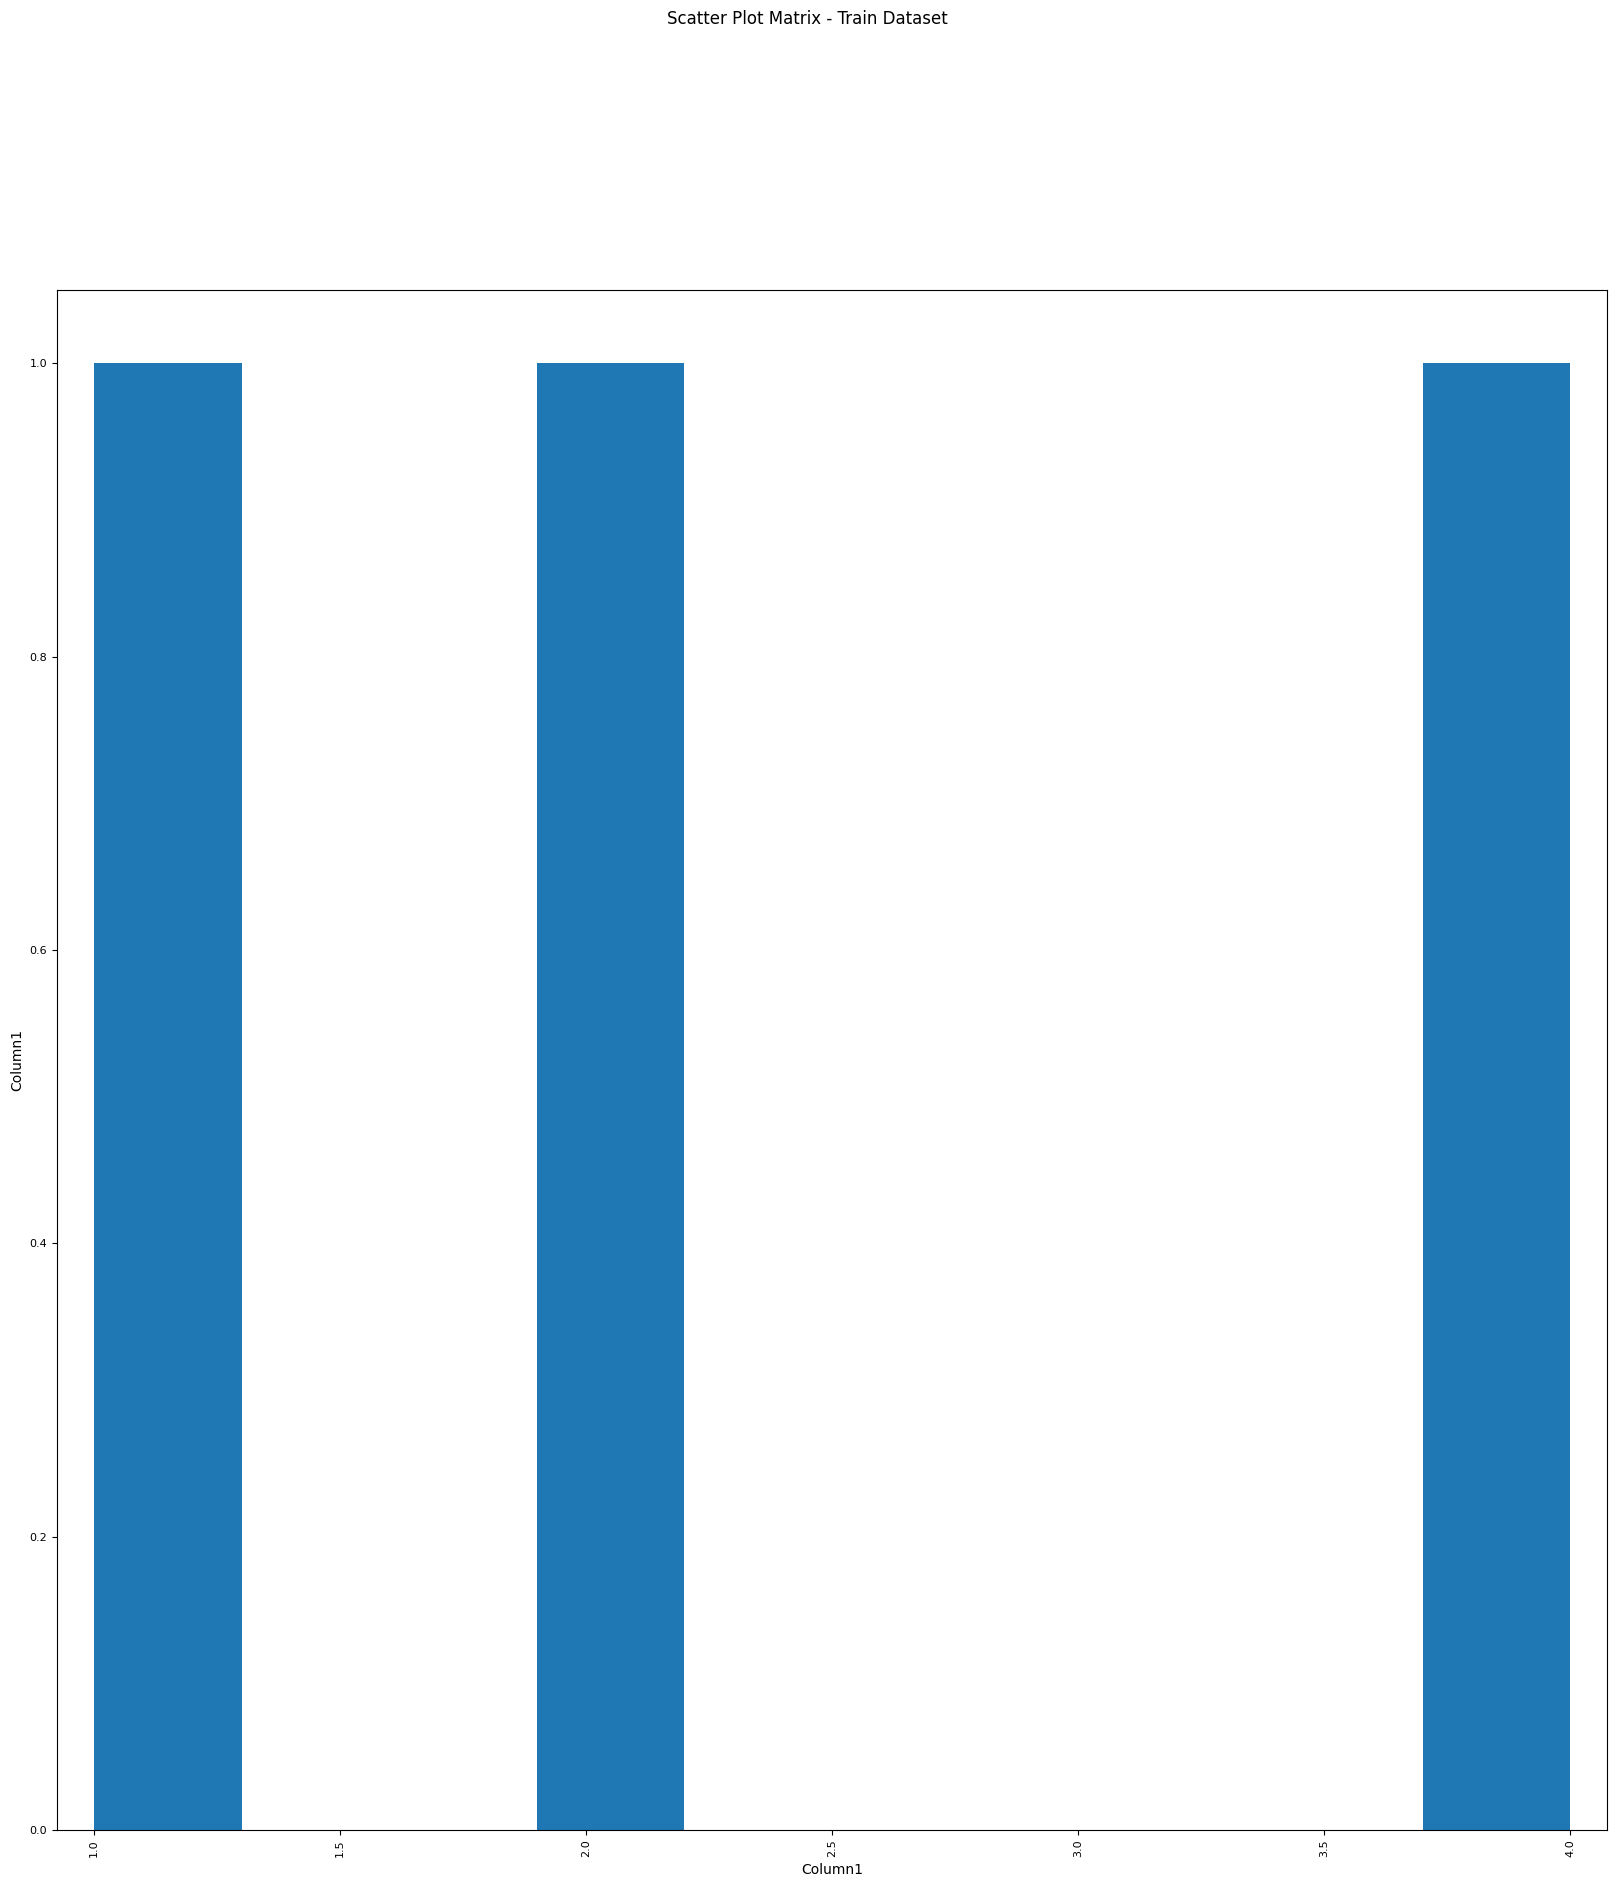

In [52]:
# Additional visualizations

# Scatter plot matrix for numerical variables
pd.plotting.scatter_matrix(df_train_cleaned.select_dtypes(include=[np.number]), figsize=(20, 20))
plt.suptitle('Scatter Plot Matrix - Train Dataset', y=1.02)
plt.show()


In [61]:
import pandas as pd

# Assuming you have the corrected DataFrame with the 'Age' column
df_train_cleaned = pd.DataFrame({
    'Age': [25, 30, 35],
    'PL': [100, 120, 110],
    'PR': [80, 90, 85],
    'Sepsis': ['No', 'Yes', 'No']  # Assuming a column named 'Sepsis'
})

import plotly.express as px

fig = px.scatter_3d(df_train_cleaned, x='Age', y='PL', z='PR', color='Sepsis')
fig.show()

In [66]:
import pandas as pd
import plotly.express as px

# Assuming your DataFrame is named df_train_cleaned

# Check if all columns in 'dimensions' are present in the DataFrame
if all(col in df_train_cleaned.columns for col in ['Age', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2']):
  fig = px.parallel_coordinates(df_train_cleaned, color="Sepsis",
                                dimensions=['Age', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2'])
  fig.show()

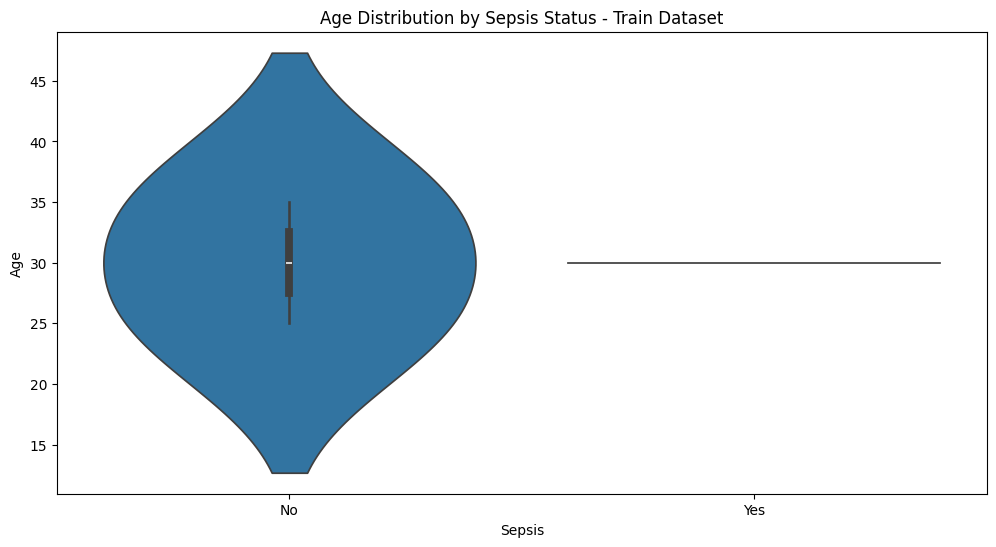

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Corrected code
plt.figure(figsize=(12, 6))
sns.violinplot(x='Sepsis', y='Age', data=df_train_cleaned)  # Corrected column name
plt.title('Age Distribution by Sepsis Status - Train Dataset')
plt.show()


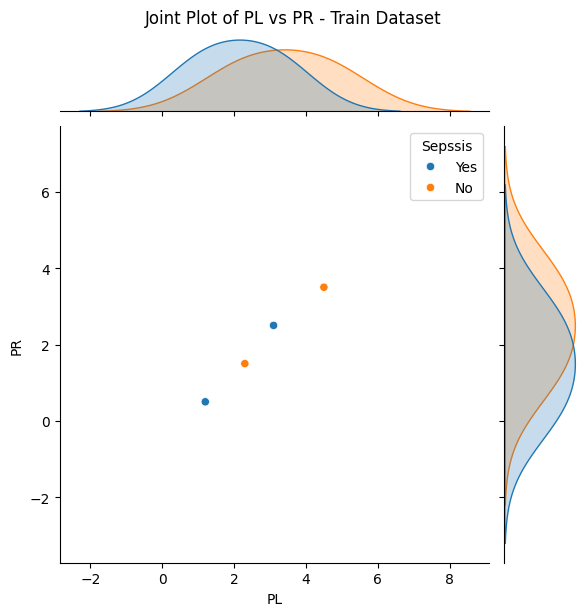

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a sample DataFrame to mimic the structure of df_train_cleaned
data = {
    'PL': [1.2, 2.3, 3.1, 4.5],
    'PR': [0.5, 1.5, 2.5, 3.5],
    'Sepssis': ['Yes', 'No', 'Yes', 'No']
}
df_train_cleaned = pd.DataFrame(data)

# Ensure column names are correct and match those referenced in the code
sns.jointplot(x='PL', y='PR', data=df_train_cleaned, hue='Sepssis', kind='scatter')
plt.suptitle('Joint Plot of PL vs PR - Train Dataset', y=1.02)
plt.show()


In [69]:
# Save cleaned datasets
df_train_cleaned.to_csv('cleaned_train_dataset.csv', index=False)
df_test_cleaned.to_csv('cleaned_test_dataset.csv', index=False)
